# Use a Community QLattice to predict bike prices

# Abstract
In this notebook, I will use the QLattice symbolic regressor to discover a relatively simple mathematical model that can predict the sales price of used motorbikes

I find a simple mathematical model that uses only three features to predict the prices with an $R^2$ of 0.94 and an RMSE of 21,749. I conclude that in a few lines of code, the QLattice is able to find a model which is surprisingly accurate, yet simple enough to be used in practice to estimate the price of a uses bike.

I find that price:
- falls with age
- Price increases exponentially with power
- BMWs generally have the highest price, while Royal Enfields has the lowest.

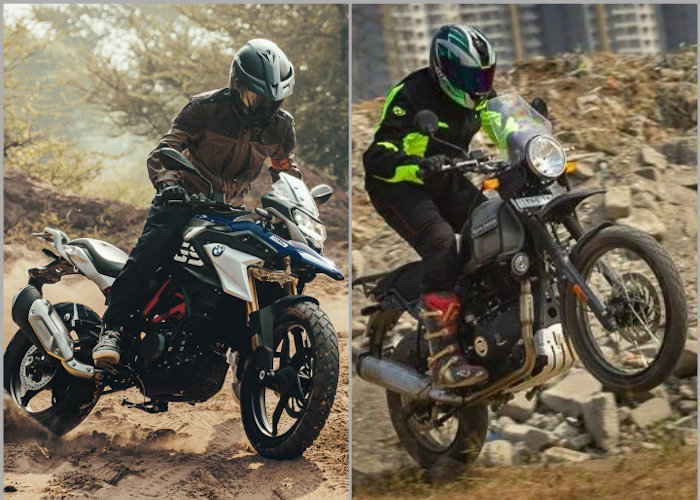

# The QLattice
The QLattice is a supervised machine learning tool for symbolic regression developed by [Abzu](https://www.abzu.ai). QLattices have been shown in research to perform very well and yield simple and explainable models: [Symbolic regression outperforms other models for small data sets](https://arxiv.org/abs/2103.15147)

Abzu provides free QLattices for non-commercial use. Read more about how it works here: https://docs.abzu.ai/docs/guides/getting_started/community.html

The feyn Python module is not installed on Kaggle by default so we have to pip install it first.

In [ ]:
!pip install feyn

In [ ]:
import pandas as pd
import feyn

# Data
Read in the data and have a quick look at it:

In [ ]:
df = pd.read_csv("/kaggle/input/used-bikes-prices-in-india/Used_Bikes.csv")
df.head()

In [ ]:
#df = df.drop(["bike_name"],axis=1)

A lot of categorical features

# Value counts

In [ ]:
df.nunique()

In [ ]:
train, test = feyn.tools.split(df, ratio=(4,1), random_state=42)

# Allocate a QLattice
The actual QLattice is a quantum simulator that runs on Abzu's hardware, but we can allocate one to use for our analysis with a single line of code. Hopefully the following line will get us one.

In [ ]:
ql = feyn.connect_qlattice()
ql.reset(random_seed=42)

# Categorical data

The QLattice will work fine with both categorical and numerical data. I just need to tell it which is which.
Read more about categorical data in the QLattice here: https://docs.abzu.ai/docs/guides/essentials/stypes.html

In [ ]:
stypes = {
    "bike_name": "cat",
    "city": "cat",
    "owner": "cat",
    "brand": "cat",
}

In [ ]:
models = ql.auto_run(train, output_name="price", stypes=stypes, max_complexity=7)

# RMSE of train and test data

In [ ]:
print("Train RMSE:", models[0].rmse(train))
print("Test RMSE:", models[0].rmse(test))

# $R^2$ of train and test data

In [ ]:
print("Train R2", models[0].r2_score(train))
print("Test R2", models[0].r2_score(test))

# A regression plot
Plot predicted vs actual in a regression plot

In [ ]:
models[0].plot_regression(test)

# Impact of power on price

In [ ]:
models[0].plot_partial(test, by="power")

# Impact of age on price
Price as a function of age. Notice the increase towards the end, indicating that classic bikes breaks the trend of price dropping with age

In [ ]:
models[0].plot_partial(test, by="age")

# Price for individual brands
The price distribution of each brand ordered by the characteristic price according to the model

In [ ]:
models[0].plot_partial(test, by="brand")

# Conclusion
We can predict the sales price with good accuracy with a simple model.

I notice that the model performs better on the _test_ set than on the _training_ set. This would indicate to me that outliers are causing problems, and most of the outliers ended up in the training set.

# Further work
Things that should be tried:
- Remove outliers
- Simplify the categoricals by having at least 10 percent in each categoy and binning the others as "other".
- Try with mean absolute error rather than sqared error
